In [1]:
import pandas as pd                    #For reading the dataset
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import seaborn as sn                   # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
#making dataframes of test and test csv files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#checking the columns in the train
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [4]:
#checking the columns of the test dataset
test.columns 
#it is infered that target is the target variable here
#there are 11 independent variables and 1 dependent variable

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
      dtype='object')

In [5]:
train.shape, test.shape

((79853, 12), (34224, 11))

In [6]:
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [7]:
#printing first five rows of the dataset
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


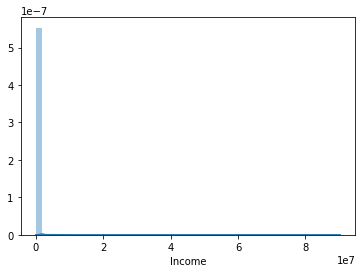

In [8]:
sn.distplot(train["Income"])

In [9]:
from sklearn.preprocessing import StandardScaler 

In [10]:
train['Income'] = StandardScaler().fit_transform(np.array(train['Income']).reshape(-1, 1)) 

In [11]:
test['Income'] = StandardScaler().fit_transform(np.array(test['Income']).reshape(-1, 1)) 

# UNIVARIATE ANALYSIS

In [12]:
# distribution of target variable
train['target'].value_counts()

In [13]:
# Normalize can be set to True to print proportions instead of number 
train['target'].value_counts(normalize=True)

In [14]:
# plotting the bar plot of frequencies
train['target'].value_counts().plot.bar()

In [15]:
#plotting distplot of age_in_days to check how many people belong to a particulat age group
sn.distplot(train["age_in_days"])

In [16]:
#converting the age_in_days to age in years by dividing it by 365
train["age_in_days"] = train.age_in_days.apply(lambda x : x/365)

Here,we can infer that most of te clients are from the age group 40-50

In [17]:
plt.hist(train["Income"])

In [18]:
train['Count_3-6_months_late'].value_counts().plot.bar()

In [19]:
train['Count_3-6_months_late'].value_counts(normalize=True)

From the above distribution we can claerly infer that most of around 84% of the people are not late in paying the premiums(3-6 months late)

In [20]:
train['Count_6-12_months_late'].value_counts().plot.bar()

In [21]:
train['Count_6-12_months_late'].value_counts(normalize=True)

From the above distribution we can claerly infer that most of around 95% of the people are not late 
in paying the premiums(3-6 months late)

In [22]:
train['Count_more_than_12_months_late'].value_counts().plot.bar()

In [23]:
train['Count_more_than_12_months_late'].value_counts(normalize=True)

From the above distribution we can claerly infer that most of around 95% of the people are not late in paying the premiums(3-6 months late)

In [24]:
train['residence_area_type'].value_counts().plot.bar()

In [25]:
train['residence_area_type'].value_counts(normalize=True)

Around 60% of the clients reside in Urban area and around 40% of the clients reside in Rural area

# BIVARIATE ANALYSIS

Now we will explore these variables against the target variable using bivariate analysis.

In [26]:
pd.crosstab(train['residence_area_type'],train['target'])

The above 2-way table shows relationship between 'residence_area_type' and 'target'

In [27]:
sn.barplot(x=train["target"],y=train["no_of_premiums_paid"]);

From,the above bar plot between "no_of_premiums_paid" and "target" variables we can infer that customers who have paid more premiums on time till now are more likely to pay premium on time

In [28]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

# HANDLING THE OUTLIERS

Now,we will be checking for outliers present in out dataset

In [29]:
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,51.634786,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,14.270463,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,21.013699,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,41.024658,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,51.027397,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,62.016438,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,103.019178,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


Looking at the 'age_in_days' variable, it is easy to detect outliers resulting from incorrect data. The minimum and maximum ages are 0, and 103, respectively.

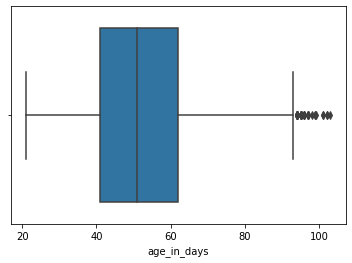

In [30]:
sn.boxplot(x=train['age_in_days'])

In [31]:
median = float(train['age_in_days'].median())                                           #calculating median of 'age_in_days'
print (median)

51.02739726027397


Now,we will be replacing the values in the 'age_in_days' by median value

In [32]:
train["age_in_days"] = train["age_in_days"].mask(train["age_in_days"] >85, median)

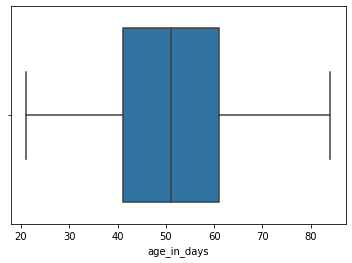

In [33]:
sn.boxplot(x=train['age_in_days'])

In [34]:
train['age_in_days'].describe()

count    79853.000000
mean        51.160854
std         13.650771
min         21.013699
25%         41.024658
50%         51.027397
75%         61.030137
max         84.041096
Name: age_in_days, dtype: float64

(array([2.1852e+04, 3.7769e+04, 1.5232e+04, 3.8790e+03, 7.8900e+02,
        2.4700e+02, 4.6000e+01, 1.8000e+01, 1.3000e+01, 8.0000e+00]),
 array([ 2. ,  7.8, 13.6, 19.4, 25.2, 31. , 36.8, 42.6, 48.4, 54.2, 60. ]),
 <a list of 10 Patch objects>)

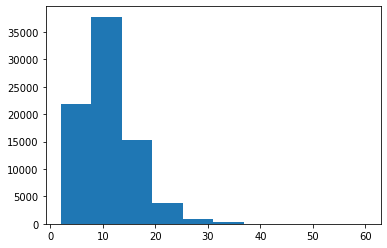

In [35]:
plt.hist(train['no_of_premiums_paid'])

In [36]:
train['no_of_premiums_paid'] = train['no_of_premiums_paid'].mask(train['no_of_premiums_paid'] >25,np.median(train['no_of_premiums_paid']))

{'whiskers': [<matplotlib.lines.Line2D at 0x247e602ee88>,
 'caps': [<matplotlib.lines.Line2D at 0x247e5f86e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x247e602e4c8>],
 'medians': [<matplotlib.lines.Line2D at 0x247e5f8adc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x247e5f8aec8>],
 'means': []}

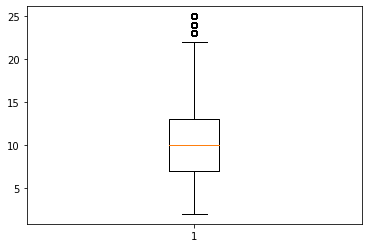

In [37]:
plt.boxplot(train['no_of_premiums_paid'])

In [38]:
train['no_of_premiums_paid'] = np.sqrt(train['no_of_premiums_paid'])

(array([ 2472.,  2907.,  9850., 13807., 15152., 11802., 12004.,  6625.,
         3327.,  1907.]),
 array([1.41421356, 1.77279221, 2.13137085, 2.48994949, 2.84852814,
        3.20710678, 3.56568542, 3.92426407, 4.28284271, 4.64142136,
        5.        ]),
 <a list of 10 Patch objects>)

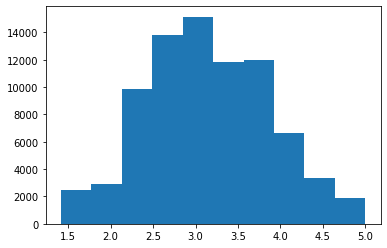

In [39]:
plt.hist(train['no_of_premiums_paid'])

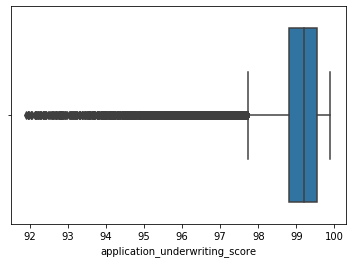

In [40]:
sn.boxplot(x=train['application_underwriting_score'])

In [41]:
train["application_underwriting_score"] = train["application_underwriting_score"].mask(train["application_underwriting_score"] <98, np.mean(train['application_underwriting_score']))

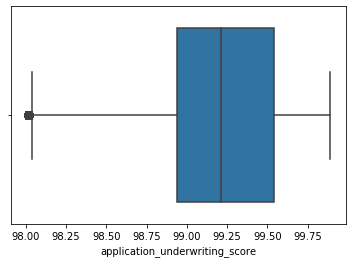

In [42]:
sn.boxplot(x=train['application_underwriting_score'])

# HANDLING THE MISSING VALUES

Next we will look for any missing values in the dataset.

In [43]:
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

There are 97 missing values in 'Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late' columns
and 2974 missing values in the 'application_underwriting_score column'

Next,
we will focussing in handling these missing values

We are replacing all the null values present in the data with 0

In [44]:
train['Count_3-6_months_late'].fillna(0.0,inplace=True)

In [45]:
train['Count_6-12_months_late'].fillna(0.0,inplace=True)

In [46]:
train['Count_more_than_12_months_late'].fillna(0.0,inplace=True)

In [47]:
train['application_underwriting_score'].median()

99.21

In [48]:
train['application_underwriting_score'].fillna(train['application_underwriting_score'].median(),inplace=True)

Now,again after replacing the null values we will check if there are any more missing values

In [49]:
train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

# MODEL BUILDING

Next, we will start to build our predictive model to predict whether a client will pay premium on time or not

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies.

In [50]:
target = train['target']
train = train.drop('target',1)

In [51]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

Now, its time to build our model. We will split the train data into training and validation set so that we will be able to validate the results of our model on the validation set. We will keep 20% data as validation set and rest as the training set.

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# splitting into train and validation with 30% data in validation set and 70% data in train set.
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.3, random_state=42)

Now our data is ready. Its time to build our model and check its performance. Logistic regression is used for classification problems and as it is a classification problem let's first build a Logistic Regression model.

# Logistic Regression¶

In [54]:
from sklearn.linear_model import LogisticRegression

In [56]:
# defining the logistic regression model
lreg = LogisticRegression(random_state = 10,C=10,max_iter=200,fit_intercept=False,solver='liblinear',verbose=100,intercept_scaling=1)

In [58]:
# fitting the model on  X_train and y_train
lreg.fit(X_train,y_train)

[LibLinear]

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='liblinear', tol=0.0001, verbose=100,
                   warm_start=False)

In [59]:
# making prediction on the validation set
lreg_prediction = lreg.predict_proba(X_val)

In [68]:
from sklearn.metrics import accuracy_score

In [62]:
print(lreg_prediction)

[[0.06613739 0.93386261]
 [0.05516094 0.94483906]
 [0.06428729 0.93571271]
 ...
 [0.0582269  0.9417731 ]
 [0.04490424 0.95509576]
 [0.08284939 0.91715061]]


# Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
clf = DecisionTreeClassifier(max_depth=None, random_state=1,min_samples_split=4,min_samples_leaf=2,splitter="random",criterion="entropy")

In [65]:
clf.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='random')

In [66]:
dt_prediction = clf.predict(X_val)

In [69]:
accuracy_score(y_val, dt_prediction)

0.8864585072633161

In [70]:
#dt_prediction = clf.predict_proba(X_val)

In [71]:
#print(dt_prediction)

# RANDOM FOREST

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rf = RandomForestRegressor(n_estimators =2000, random_state = 42)

In [74]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [75]:
rf_prediction = rf.predict(X_val)

In [76]:
print(rf_prediction)

[0.9985 0.998  0.995  ... 0.983  0.964  0.9775]


Checking for null values in the test dataset and handling them

In [77]:
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [78]:
test['Count_3-6_months_late'].fillna(0.0,inplace=True)

In [79]:
test['Count_6-12_months_late'].fillna(0.0,inplace=True)

In [80]:
test['Count_more_than_12_months_late'].fillna(0.0,inplace=True)

In [81]:
test['application_underwriting_score'].fillna(test['application_underwriting_score'].mean(),inplace=True)

In [82]:
test["age_in_days"] = test.age_in_days.apply(lambda x : x/365)

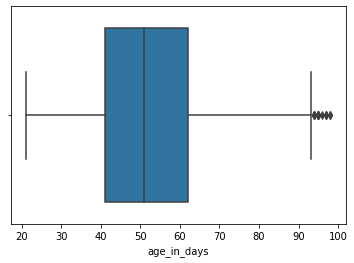

In [83]:
sn.boxplot(test['age_in_days'])

In [84]:
test["age_in_days"] = test["age_in_days"].mask(test["age_in_days"] >95, np.median(test['age_in_days']))

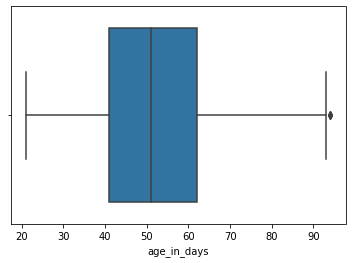

In [85]:
sn.boxplot(test['age_in_days'])

{'whiskers': [<matplotlib.lines.Line2D at 0x247e75ff8c8>,
 'caps': [<matplotlib.lines.Line2D at 0x247e75fff48>,
 'boxes': [<matplotlib.lines.Line2D at 0x247e7607f88>],
 'medians': [<matplotlib.lines.Line2D at 0x247e75f9e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x247e75f9f48>],
 'means': []}

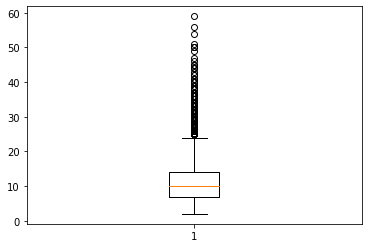

In [86]:
plt.boxplot(test['no_of_premiums_paid'])

In [87]:
test['no_of_premiums_paid'] = test['no_of_premiums_paid'].mask(test['no_of_premiums_paid'] >25,np.median(test['no_of_premiums_paid']))

{'whiskers': [<matplotlib.lines.Line2D at 0x247e4b68648>,
 'caps': [<matplotlib.lines.Line2D at 0x247e4b68cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x247e4b6ee88>],
 'medians': [<matplotlib.lines.Line2D at 0x247e4b96c48>],
 'fliers': [<matplotlib.lines.Line2D at 0x247e4b96d48>],
 'means': []}

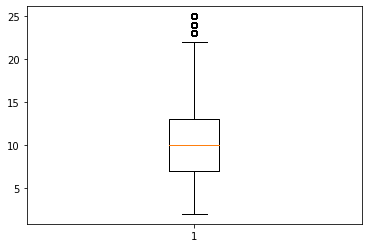

In [88]:
plt.boxplot(test['no_of_premiums_paid'])

(array([2350., 4206., 5816., 9219., 4408., 3192., 2759., 1069.,  639.,
         566.]),
 array([ 2. ,  4.3,  6.6,  8.9, 11.2, 13.5, 15.8, 18.1, 20.4, 22.7, 25. ]),
 <a list of 10 Patch objects>)

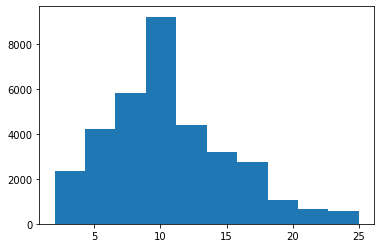

In [89]:
plt.hist(test['no_of_premiums_paid'])

In [90]:
test['no_of_premiums_paid'] = np.sqrt(test['no_of_premiums_paid'])

(array([1111., 1239., 4206., 5816., 6552., 5030., 5237., 2759., 1426.,
         848.]),
 array([1.41421356, 1.77279221, 2.13137085, 2.48994949, 2.84852814,
        3.20710678, 3.56568542, 3.92426407, 4.28284271, 4.64142136,
        5.        ]),
 <a list of 10 Patch objects>)

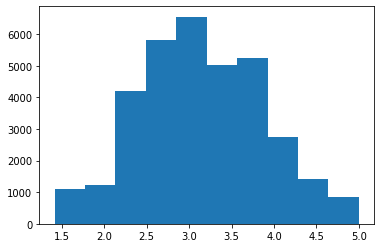

In [91]:
plt.hist(test['no_of_premiums_paid'])

In [95]:
test = pd.get_dummies(test)

In [96]:
test.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel_A                  0
sourcing_channel_B                  0
sourcing_channel_C                  0
sourcing_channel_D                  0
sourcing_channel_E                  0
residence_area_type_Rural           0
residence_area_type_Urban           0
dtype: int64

Making prediction on the test dataset

In [97]:
#test_prediction_dt = clf.predict_proba(test)

In [98]:
#print(test_prediction_dt)

In [99]:
#test_prediction_dt = clf.predict(test)

In [100]:
test_prediction_lreg = lreg.predict_proba(test)

In [101]:
print(test_prediction_lreg)

[[0.05652974 0.94347026]
 [0.04635776 0.95364224]
 [0.06480473 0.93519527]
 ...
 [0.06222387 0.93777613]
 [0.06328414 0.93671586]
 [0.06108019 0.93891981]]


In [100]:
test_prediction_rf=rf.predict(test)

In [101]:
print(test_prediction_rf)

[0.997  0.9895 0.875  ... 0.9505 0.8505 0.9425]


In [102]:
submission = pd.DataFrame()

In [103]:
submission['id'] = test['id']
#submission['target']=test_prediction_lreg
#submission['target'] = test_prediction_lreg[:,-1]
#submission['target'] = test_prediction_dt
submission['target']=test_prediction_rf

In [104]:
submission.to_csv('submission.csv', header=True, index=False)